In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [9]:
# impornt mnist digits dataset from torchvision
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=None, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=None, download=True)

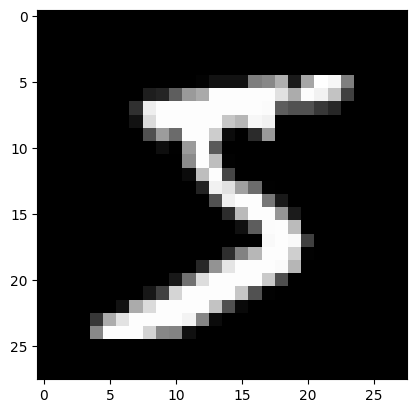

In [11]:
train_images = train_dataset.data
train_images.shape
train_images[0].shape
train_images = train_images/255
plt.imshow(train_images[0], cmap='gray')

In [12]:
#split images into 80% train 10% val and 10% test datasets

X_train, X_temp, y_train, y_temp = train_test_split(train_images, train_dataset.targets, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: torch.Size([48000, 28, 28]), Val: torch.Size([6000, 28, 28]), Test: torch.Size([6000, 28, 28])


In [16]:
# Define the model class
# Below model follows LeNet Architecture
class LeNet5(nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5, stride=1, padding=2)
    self.relu1 = nn.Sigmoid()
    self.maxpool1 = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(6, 16, 5, stride=1, padding=0)
    self.relu2 = nn.ReLU()
    self.maxpool2 = nn.MaxPool2d(2)
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(400, 128)
    self.relu3 = nn.ReLU()
    self.linear2 = nn.Linear(128, 84)
    self.linear3 = nn.Linear(84, 10)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.maxpool1(out)
    out = self.conv2(out)
    out = self.relu2(out)
    out = self.maxpool2(out)
    out = self.flatten(out)
    out = self.linear1(out)
    out = self.relu3(out)
    out = self.linear2(out)
    out = self.linear3(out)
    out = self.softmax(out)
    return out

# Create an instance of the model
model = LeNet5()


In [ ]:
# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
batch_size = 100
trainloss=list()
valloss=list()
# Train the model for 1000 epochs
for epoch in range(20):
  # Iterate over the training data in batches of 32
  for i in range(X_train.shape[0] // batch_size):
    # print(i)
    # Get the inputs and labels for the current batch
    inputs = X_train[batch_size*i:batch_size*(i+1)].view(batch_size,1,28,28)
    labels = y_train[batch_size*i:batch_size*(i+1)]

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # store training lose after every epoch
  trainloss.append(loss.item())

  # Evaluate the model on the validation set
  model.eval()
  with torch.no_grad():
    for i in range(X_val.shape[0] // batch_size):
      # Get the inputs and labels for the current batch
      inputs = X_val[batch_size*i:batch_size*(i+1)].view(batch_size,1,28,28)
      labels = y_val[batch_size*i:batch_size*(i+1)]

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
  valloss.append(loss.item())

  print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")

# Save the trained model
torch.save(model.state_dict, "trained_model.pt")


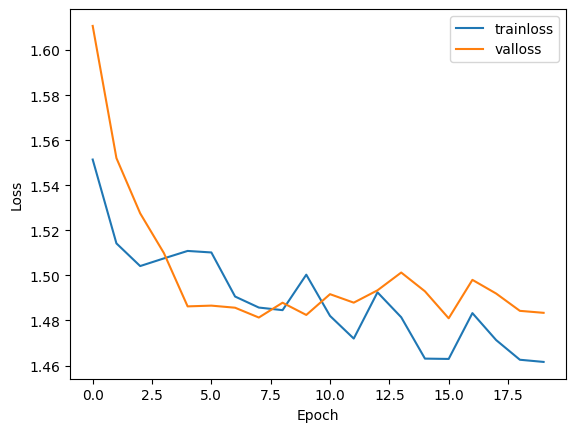

In [18]:
# plot trainloss and valloss for each epoch in single graph

plt.plot(trainloss, label='trainloss')
plt.plot(valloss, label='valloss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [20]:
#find accuracy on test dataset

model.eval()

correct = 0
total = 0

with torch.no_grad():
  for i in range(X_test.shape[0]):
    # Get the inputs and labels for the current batch
    inputs = X_test[i].view(1,1,28,28)
    labels = y_test[i]

    # Forward pass
    outputs = model(inputs)

    # Get the predicted class
    _, predicted = torch.max(outputs.data, 1)

    # Update the correct and total counters
    total += 1
    correct += (predicted == labels).sum().item()

# Calculate and print the accuracy
accuracy = 100 * correct / total
print(f"Accuracy on test dataset: {accuracy:.2f}%")


Accuracy on test dataset: 98.88%


8


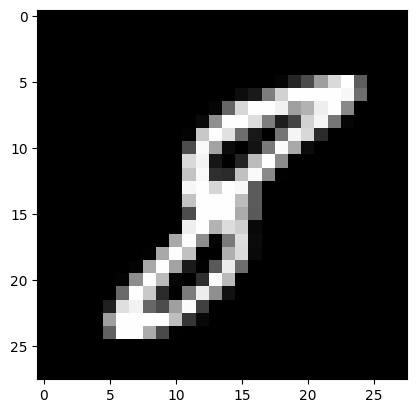

In [23]:
model.eval()
pred=model(X_test[5].view(1,1,28,28))
plt.imshow(X_test[5], cmap='gray')
print(pred.argmax().item())